<a href="https://colab.research.google.com/github/Vihimuro/MDAEL8/blob/main/minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

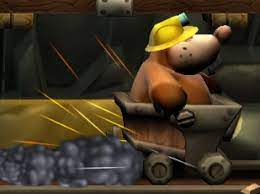

Mineração de Dados


Alunos: Tiago Júnio Tegon Nascimento e Vinícius Himuro Augusto

Githubs: https://github.com/TiagoTegon/MDAEL8.git e https://github.com/Vihimuro/MDAEL8

Database escolhida: Congressional Voting Records Data Set

link: https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

Atividade 1 - Pré-processamento de dados

Github de referência: https://github.com/murilovarges/DataMiningSamples/blob/master/1-Preprocessing/DataCleaning.py

Fazendo os imports 

In [ ]:
import pandas as pd
import numpy as np

Main

In [ ]:
def main():
    # Faz a leitura do arquivo
    names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
             'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
             'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
    features = names
    output_file = '/content/house-votes-84clear.data'
    input_file = '/content/house-votes-84.data'
    df = pd.read_csv(input_file,         # Nome do arquivo com dados
                     names = names,      # Nome das colunas 
                     usecols = features, # Define as colunas que serão  utilizadas
                     na_values='?')      # Define que ? será considerado valores ausentes
    
    df_original = df.copy()
    # Imprime as 15 primeiras linhas do arquivo
    print("PRIMEIRAS 15 LINHAS\n")
    #print(df.head(15))
    print("\n")        

    # Alterandos os dados:
    # republican => 0
    df['Class-Name'] = df['Class-Name'].replace(['republican'],0)
    #print(df['Class-Name'].head(15))

    # democrat => 1
    df['Class-Name'] = df['Class-Name'].replace(['democrat'],1)
    #print(df['Class-Name'].head(15))

    # n-> 0
    df = df.replace(['n'],int(0))
    #print(df.head(15))

    # y-> 1
    df = df.replace(['y'],int(1))
    #print(df.head(15))

    # Imprime informações sobre dos dados
    print("INFORMAÇÕES GERAIS DOS DADOS\n")
    print(df.info())
    print("\n")
    
    # Imprime uma analise descritiva sobre dos dados
    print("DESCRIÇÃO DOS DADOS\n")
    print(df.describe())
    print("\n")
    
    # Imprime a quantidade de valores faltantes por coluna
    print("VALORES FALTANTES\n")
    print(df.isnull().sum())
    print("\n")    
    
    columns_missing_value = df.columns[df.isnull().any()]
    print(columns_missing_value)
    method = 'number' # number or median or mean or mode
    
    for c in columns_missing_value:
        UpdateMissingValues(df, c)
    
    print(df.describe())
    print("\n")
    print(df.head(15))
    print(df_original.head(15))
    print("\n")
    
    # Salva arquivo com o tratamento para dados faltantes
    df.to_csv(output_file, header=False, index=False)  
    

def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)




if __name__ == "__main__":
    main()

PRIMEIRAS 15 LINHAS



INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class-Name                              435 non-null    int64  
 1   handicapped-infants                     423 non-null    float64
 2   water-project-cost-sharing              387 non-null    float64
 3   adoption-of-the-budget-resolution       424 non-null    float64
 4   physician-fee-freeze                    424 non-null    float64
 5   el-salvador-aid                         420 non-null    float64
 6   religious-groups-in-schools             424 non-null    float64
 7   anti-satellite-test-ban                 421 non-null    float64
 8   aid-to-nicaraguan-contras               420 non-null    float64
 9   mx-missile                              413 non-null    float64
 10  immigrati